# Chapter 4: Magnets

At the end of the last chapter, we got a first taste of magnetism in the context of the Pauli paramagnet. This isn't really a magnet, though, as the magnetization only persists in the presence of a magnetic field. Under that definition, *you* are a good magnet! In this chapter, we'll build on the statistical mechanics of the last couple of chapters and work with 'real' magnets, such as you might find on your fridge. In the process we'll explore the Monte Carlo and Metropolis algorithms, and we'll learn some more statistical mechanics. 

As usual, we start by loading numpy and matplotlib (and this time random):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 4.1.3 Assignment 7 Problems (40 points): Simulate the spin-1 Pauli paramagnet

**Problem:** Now suppose that each atom in the metal can point in three directions: $\uparrow$, $\rightarrow$, and $\downarrow$, corresponding to energy levels $-\mu_BB$, $0$, and $\mu_BB$. (Note that I am no longer saying electrons, because electrons have spin-$1/2$, so can't take on three values. Rather, one can imagine that the atomic spin is a combination of nuclear and electronic contributions). Derive expressions for the probabilities for the three spin orientations. **Important note:** you'll be left with two equations ($p_1+p_2+p_3=1$ and the total energy equation) and three unknowns ($p_1$, $p_2$, and $p_3$). But at equilibrium the entropy is a maximum, so you can get a third equation by insisting that $dS/dp_3=0$. Using these, repeat the procedure from part (b) above to obtain (and plot) the probabilities, magnetization, total energy, and the entropy as a function of $\tilde{T}$ at fixed $B$.

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

"""
This function calculates the derrivative via approximation between points.
"""
def approxDerriv(Xs, Ys):
  derriv = []
  index = 1
  while index < len(Xs):
    derriv.append((Ys[index] - Ys[(index-1)])/(Xs[index] - Xs[(index-1)]))
    index += 1
  return derriv

In [3]:
"""
Derrived from the attached analytic derrivation, for 3 possible states the probabilities can be parameterized as follows:
Our parameter is a = U/Ne.
"""
def prob3(a):
  return ((4+3*a)-(-3*(a**2) +  4)**(1/2))/6

def prob2(a):
  return ((1+a)-2*prob3(a))

def prob1(a):
  return (prob3(a) - a)

"""
Gets the theoretical shannon-boltzmann entropy given N number of particles and probabilities. a = U/Ne edition
"""
def getShanEnt(N, a):
  p1 = prob1(a)
  p2 = prob2(a)
  p3 = prob3(a)
  return (-N)*( (p1)*(np.log((p1))) + (p2)*(np.log(p2)) + (p3)*(np.log(p3)))


[-1.01, -1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01]


C:\Users\Orko\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
C:\Users\Orko\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
C:\Users\Orko\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


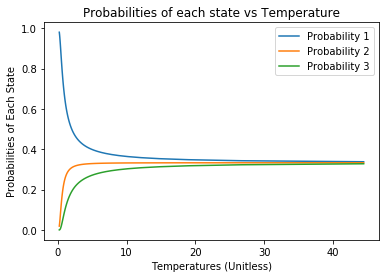

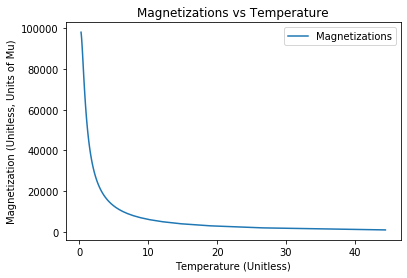

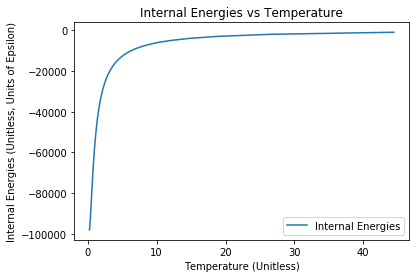

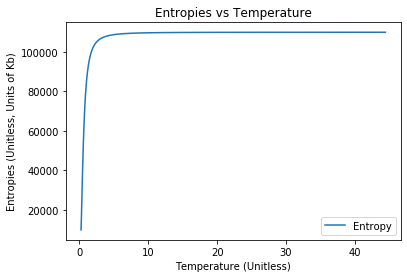

In [4]:
#Fineness of the As we want to sample over
gridSize = 100
#A goes from -1 to 0.
As = [x/gridSize for x in range( ((-1)*gridSize)-1, 0)]

#Sanity check: As.
print(As)

#Number of particles
N = 100000

#Values we're looking for
probs = []
prob1s = []
prob2s = []
prob3s = []
entropies = []
magnetizations = []
totalEnergy = []
for a in As:
  #Probabilities for a given a
  p1 = prob1(a)
  p2 = prob2(a)
  p3 = prob3(a)
  prob1s.append(p1)
  prob2s.append(p2)
  prob3s.append(p3)
  probs.append((p1, p2, p3))

  #Entropies for a given a and N
  entropies.append(getShanEnt(N, a))

  #Using the definition for the (unitless, units of epsilon) internal energy: n2-n1, or in this case as n3 is big and n2 is 0, n3-n1
  totalE = N*p3 - N*p1
  totalEnergy.append(totalE)

  #Using the definition for the (unitless, units of mu) magnetization, n1-n2, or in this case n3-n1 as n2 is the flat state.
  magnet = N*p1 - N*p3
  magnetizations.append(magnet)

#The derrivative is already flipped, by inputting U as the Ys, and S as the bottom, we get temperatures T
temperature = approxDerriv(entropies, totalEnergy)

"""
Plots
"""
plt.figure()
plt.plot(temperature, prob1s[1:], label = "Probability 1")
plt.plot(temperature, prob2s[1:], label = "Probability 2")
plt.plot(temperature, prob3s[1:], label = "Probability 3")

plt.title("Probabilities of each state vs Temperature")
plt.xlabel("Temperatures (Unitless)")
plt.ylabel("Probabilities of Each State")
plt.legend()

plt.figure()
plt.plot(temperature, magnetizations[1:], label = "Magnetizations")

plt.title("Magnetizations vs Temperature")
plt.xlabel("Temperature (Unitless)")
plt.ylabel("Magnetization (Unitless, Units of Mu)")
plt.legend()

plt.figure()
plt.plot(temperature, totalEnergy[1:], label = "Internal Energies")

plt.title("Internal Energies vs Temperature")
plt.xlabel("Temperature (Unitless)")
plt.ylabel("Internal Energies (Unitless, Units of Epsilon)")
plt.legend()

plt.figure()
plt.plot(temperature, entropies[1:], label = "Entropy")

plt.title("Entropies vs Temperature")
plt.xlabel("Temperature (Unitless)")
plt.ylabel("Entropies (Unitless, Units of Kb)")
plt.legend()

### Required Discussion

#### Probabilities vs Temperature: We can see that as temperature rises, all the probabilities converge on 1/3 (0.33333), largely as expected since high temperature allows the system to spin in any way. Furthermore, we can see that when the temperature is low, almost all of the probability is in the n1 state. That's because the n1 state has the lowest energy value, and when a system is in low temperature it tends to be in the lowest possible energy state. That's also why n2 rises faster than n3 - because it's easier to gain one unit of energy first than to gain two as temperature rises.

#### Magnetizations vs Temperature: We can see that as temperature rises, magnetization falls. This makes sense; as temperature rises, the previous alignment of all the particles in the n1 state which caused such high magnetization is jostled out of the way, thanks to the same argument as the above paragraph on probabilities, allowing for other states and so decreasing magnetization. It begins at 100 000, because all 100 000 particles are aligned in the n1 state.

#### Internal energies vs Temperature: As temperature rises, internal energies rise. This makes sense, as n1 was the lowest energy state, and as temperature rises, the probability of a particle being in that state decreases, increasing with the higher energy states n2 and n3, so internal energy should rise and converge on 0 (when n3 and n1 are both equally balanced). It begins at -100 000, as all 100 000 particles are aligned in the n1 state, which has a unitless energy of -1.

#### Entropies vs Temperature: As the temperature rises, the entropy very rapidly rises from nothing to slightly over 100 000. This makes sense, as rising temperature changes the system from being all in one state (very ordered, little disorder, so no entropy) to being randomized across 3 possible states per particle (and so very high disorder, and so high entropy). Note the very specific value entropy appears to go to this time. Last time, with probabilities = 1/2, it went to N*log(2). Similarly, this time it goes to N*log(3) = N*1.09.... which is about 109000 in this case, which is where it converges to.

## 4.2 Canonical Ensemble

In the last chapter, we introduced the concept of entropy, which was defined in terms of the probabilities to obtain various outcomes. We used an important but unproven assumption that the entropy is a maximum when the system is at equilibrium. We then used the relation $T^{-1}=dS/dU$ to define the temperature. This procedure is called the *microcanonical ensemble*. 

It turns out that we can build in the maximization of the entropy principle at the outset, and obtain a much simpler description of statistical mechanics at equilibrium, called the *canonical ensemble*. 

We start by maximizing the entropy: $d\ln(\Omega)=0$ and $d^2\ln(\Omega)<0$ (the latter to check that the entropy is a maximum). First let's impose the first condition:
\begin{eqnarray}
d\ln(\Omega)&=&{\partial\ln(\Omega)\over\partial n_1}dn_1+{\partial\ln(\Omega)\over\partial n_2}dn_2+\ldots=0\nonumber \\
&=&\sum_i{\partial\ln(\Omega)\over\partial n_i}dn_i=0.
\end{eqnarray}
Recall that in general we can write
$$\Omega={N!\over\prod_in_i!}$$
which means
$$\ln(\Omega)=N\ln(N)-N-\sum_in_i\ln(n_i)+\sum_in_i=N\ln(N)-\sum_in_i\ln(n_i)$$
as we have seen before. Now,
\begin{eqnarray}
{\partial\ln(\Omega)\over\partial n_j}&=&-{\partial\over\partial n_j}\sum_in_i
\ln(n_i)\qquad\mbox{(Note
the derivative w.r.t. the variable $n_j$)} \\
&=&-\sum_i\delta_{ij}\left[\ln(n_i)+1\right]=-\left[\ln(n_j)+1\right].
\nonumber
\end{eqnarray}
Substituting this into the equation above, we have:
\begin{equation}
d\ln(\Omega)=-\sum_i\left[\ln(n_i)+1\right]dn_i=0.
\end{equation}
Because $N=\sum_in_i$ and $ U=\sum_in_i\epsilon_i$ are constants, we
also know that
$$dN=\sum_idn_i=0\qquad\mbox{and}\qquad
dU=\sum_i\epsilon_idn_i=0.$$

Now we have three equations that need to be satisfied simultaneously:
$$\sum_idn_i=0;\qquad\sum_i\epsilon_idn_i=0;\qquad\mbox{and}\qquad
\sum_i\ln(n_i)dn_i=0.$$
How can I solve for the $n_i$? This is just like a classical mechanics problem where I have to solve for the dynamics of some object, subject to some constraints. The first and second of the above equations are the *holonomic equations of constraint* for the third equation! If you remember, these equations of constraint could be incorporated using he method of undetermined multipliers, otherwise known at **Lagrange multipliers**. Because I have two equations of constraint, I need two Lagrange multipliers: call them $\alpha$ and $\beta$. Now the equation I need to solve is
$$\sum_i\left[\ln(n_i)+\alpha+\beta\epsilon_i\right]dn_i=0.$$
I have effectively added zero to my original equation, twice! Now, the $dn_i$ variations are completely arbitrary, but no matter what I choose for the various $dn_i$ the left hand side *always* sums to zero. The only way to guarantee this is if the term in the square brackets is itself zero,
$$\ln(n_i)+\alpha+\beta\epsilon_i=0.$$
Inverting gives
\begin{equation}
n_i=\exp\left[-\beta\epsilon_i-\alpha\right]
=A\exp\left(-\beta\epsilon_i\right),
\end{equation}
where $A=\exp(-\alpha)$ is a constant. How to find $\alpha$ and $\beta$? Use the equations of constraint again! Since $N=\sum_iA\exp\left(-\beta\epsilon_i\right)$, knowing $\beta$ and given $N$, $A$ immediately follows. How about $\beta$? Well, because we haven't allowed any work to be done (the volume of the system is assumed fixed),
then the change in mean energy is just due to the heat:
\begin{eqnarray}
dU&=&\sum_i\epsilon_idn_i \\
&=&TdS=k_BTd\ln(\Omega)=-k_BT\sum_i\ln(n_i)dn_i.
\end{eqnarray}
Comparing the two equations above immediately shows that $\epsilon_i\propto -k_BT\ln(n_i)$. Inverting this gives
\begin{equation}
n_i\propto\exp\left(-{\epsilon_i\over k_BT}\right).\label{ni2}
\end{equation}
Comparison between the above equations shows that $\beta=1/k_BT$. Note that I also used the identity $d U=TdS$ here, which was the main relationship in the old microcanonical ensemble.

Now that I know the explicit form for $n_i$, I can put it back into the equation for the total number of particles: $N=A\sum_i\exp(\epsilon_i/k_BT)$. Because the probability of a given outcome is simply equal to the population of a given energy state, divided by the total number of particles, I obtain:
$$p_i={n_i\over N}={A\exp(-\epsilon_i/k_BT)\over
A\sum_i\exp(-\epsilon_i/k_BT)}\equiv{\exp(-\epsilon_i/k_BT)\over Z},$$
where the **partition function** is defined as
$$Z\equiv\sum_i\exp\left(-{\epsilon_i\over k_BT}\right).$$
The $Z$ stands for *Zustandsumme*, or *sum over states*. Of course, $N=AZ$. The above equation for $p_i$ is probably the most important result of this section. This is a general expression that is correct for any system at equilibrium, and it is therefore much simpler than finding the expressions in the microcanonical ensemble!

**Once you know $Z$, you know everything**. In other words, knowing the occupation probability of the various energy levels allows you to calculate any thermodynamic quantity of interest. First, let's write the entropy in terms of $Z$:
\begin{eqnarray}
S=k_B\ln(\Omega)&=&k_B\left[N\ln(N)-\sum_in_i\ln(n_i)\right]\nonumber \\
&=&k_B\left\{N\ln(N)-\sum_in_i\left[\ln(A)-\beta\epsilon_i\right]\right\} \\
&=&k_B\left\{N\ln(N)-N\ln(A)+\beta U\right\}\quad\mbox{using the
definition of $ U$.}
\end{eqnarray}
Now, $N=A\sum_i\exp(-\beta\epsilon_i)$ so
$\ln(N)=\ln(A)+\ln\left[\sum_i\exp(-\beta\epsilon_i)\right]=\ln(A)+\ln(Z)$.
Inserting this above we obtain
$$S=k_B\left[N\ln(A)+N\ln(Z)-N\ln(A)+\beta U\right].$$
Finally, we have the result for the entropy in terms of the partition function:
\begin{equation}
S=Nk_B\ln(Z)+{ U\over T}.
\end{equation}
Alternatively, we can derive the expression for the entropy in terms of the partition function starting from the Shannon form:
\begin{eqnarray}
S&=&-Nk_B\sum_ip_i\ln(p_i)=-Nk_B\sum_ip_i\ln\left({\exp(-\epsilon_i/k_BT)\over Z}\right)\\
&=&-Nk_B\sum_ip_i\left[-\frac{\epsilon_i}{k_BT}-\ln(Z)\right]=\frac{N}{T}\sum_ip_i\epsilon_i+Nk_B\ln(Z),
\end{eqnarray}
which is the same thing.
Another important quantity that immediately follows without even knowing the
explicit dependence of $U$ on $Z$ is the ${\bf Helmholtz free energy}$:
\begin{equation}
F= U-TS=-Nk_BT\ln(Z).
\end{equation}

We still don't know the explicit form for $U$ as a function of $Z$, so here goes. We already know that $U=\sum_i\epsilon_in_i=A\sum_i\epsilon_i\exp(-\beta\epsilon_i)$. This expression can be `simplified' using the fact that
$$\epsilon_i\exp(-\beta\epsilon_i)=-{\partial\over\partial\beta}\exp(-\beta
\epsilon_i)=-{\partial T\over\partial\beta}{\partial\over\partial T}
\exp(-\beta\epsilon_i)={1\over k_B\beta^2}{\partial\over\partial T}
\exp(-\beta\epsilon_i).$$
Putting it together we have
$$ U={A\over k_B\beta^2}{\partial\over\partial T}\sum_i\exp(-\beta
\epsilon_i)=Ak_BT^2{\partial Z\over\partial T}={Nk_BT^2\over Z}
{\partial Z\over\partial T}.$$
Now we're finally done:
\begin{equation}
U=Nk_BT^2{\partial\ln(Z)\over\partial T}.\label{EbarZ}
\end{equation}

## 4.2.1 Assignment 7 Problem (20 points): Example: Pauli paramagnet in the canonical ensemble

**Problem:** Return to the Pauli paramagnet, Problems 3.4.2, for the cases (i) spin-$1/2$ (spins $\uparrow$ and $\downarrow$), and (ii) spin-1 (spins $\uparrow$, $\rightarrow$, and $\downarrow$). **Construct the partition functions, and obtain the probabilities, total energy, and entropy as a function of temperature**. Notes: don't worry about randomly sampling spins; just numerically evaluate the above quantities. Also, it's easier to calculate the derivate on the partition function anaytically first, rather than calculating the derivative numerically. 

**The derivations requested in the problem will be attached to the dropbox as a pdf, as instructed by Dr.Feder**
The following code, programs the analytical functions derived, and show their behavior numerically in relation to Normalized temperature, where Normailized Temperature is defined as $\tilde{T} = k_B T$, where $k_B$ is the boltzman constant.



### The following will code case (i), spin-$1/2$

In [5]:
#Spin1/2 case
import numpy as np
import matplotlib.pyplot as plt

def partition_func_spin(T_matilda, epsillon):
    '''
    function takes Normalized T and epsillon (energy of the flip).
    returns the partition function for spin flips as analytically derived.
    '''
    
    return 2*np.cosh(epsillon/T_matilda)

def spin_p1(T_matilda, epsillon):
    
    '''
    function takes Normalized T and epsillon (energy of the flip).
    returns the spin down probabilities for spin flips as analytically derived.
    '''
    
    
    return (np.exp(epsillon/T_matilda))/partition_func_spin(T_matilda,epsillon)

def spin_p2(T_matilda, epsillon):
    
    '''
    function takes Normalized T and epsillon (energy of the flip).
    returns the spin up probabilities for spin flips as analytically derived.
    '''
    
    return (np.exp(-epsillon/T_matilda))/partition_func_spin(T_matilda,epsillon)

def spin_Total_Energy(N,T_matilda,epsillon):
    
    '''
    function takes Normalized T, epsillon (energy of the flip) and the number of particles of in the system, N.
    returns the total energy without units, for spin flips as analytically derived.
    '''
    
    return epsillon*N*(spin_p2(T_matilda, epsillon)-spin_p1(T_matilda, epsillon))

def Magnetization(N,T_matilda,epsillon):
    
    #units of u_B
    
    '''
    function takes Normalized T, epsillon (energy of the flip) and the number of particles of in the system, N.
    returns the Magnetization without units, for spin flips as analytically derived.
    '''
    
    return (spin_p1(T_matilda, epsillon)-spin_p2(T_matilda, epsillon))*N
    
def Entropy_spin(N,T_matilda,epsillon):
    
    '''
    function takes Normalized T, epsillon (energy of the flip) and the number of particles of in the system, N.
    returns the entropy without units, for spin flips as analytically derived.
    '''
    
    p1 = spin_p1(T_matilda, epsillon)
    p2 = spin_p2(T_matilda, epsillon)
    
    return -N*(p1*np.log(p1) + p2*np.log(p2))


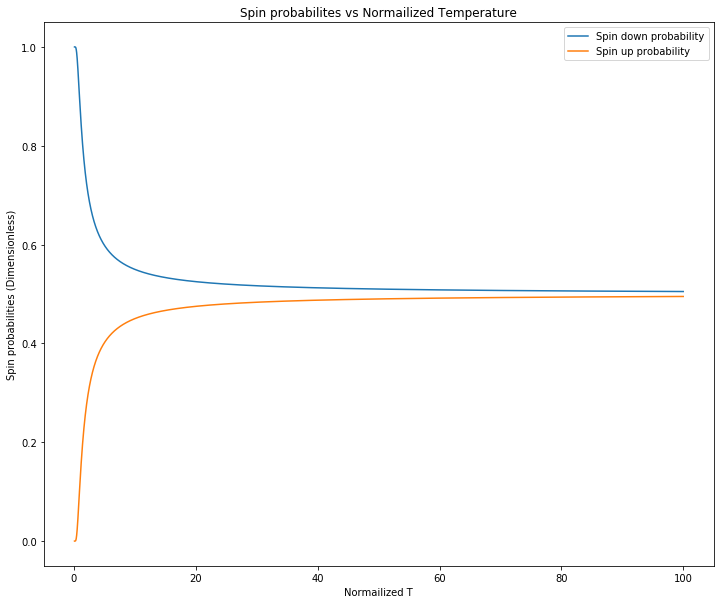

In [6]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
#plt.plot(T,partition_func_spin(T,epsillon))
plt.figure(figsize=(12,10))
plt.plot(T,spin_p1(T, epsillon),label = 'Spin down probability')
plt.plot(T,spin_p2(T, epsillon), label = 'Spin up probability')

plt.title("Spin probabilites vs Normailized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Spin probabilities (Dimensionless)')
plt.legend(loc ='best')
plt.show()

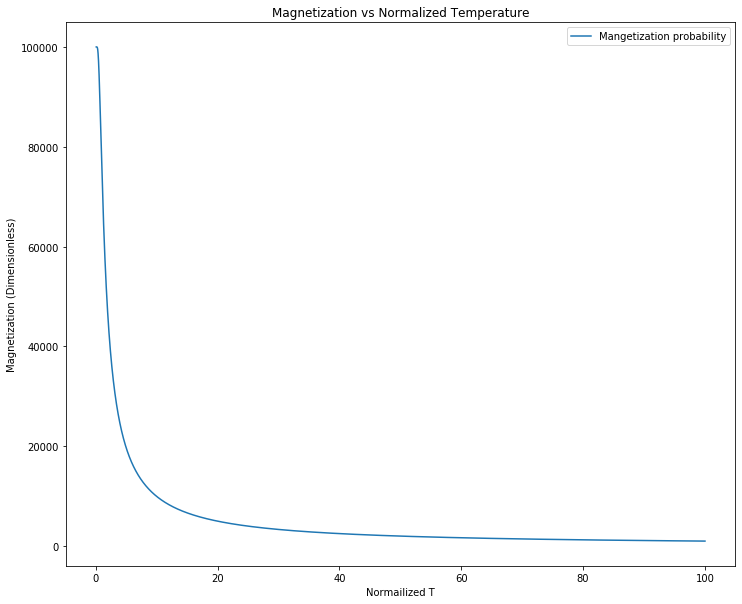

In [7]:
## PUT THIS AT THE END

epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
#plt.plot(T,partition_func_spin(T,epsillon))
plt.figure(figsize=(12,10))
plt.plot(T,Magnetization(N,T,epsillon),label = 'Mangetization probability')
#plt.plot(T,spin_p2(T, epsillon), label = 'spin down probability')

plt.title("Magnetization vs Normalized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Magnetization (Dimensionless)')
plt.legend(loc ='best')
plt.show()

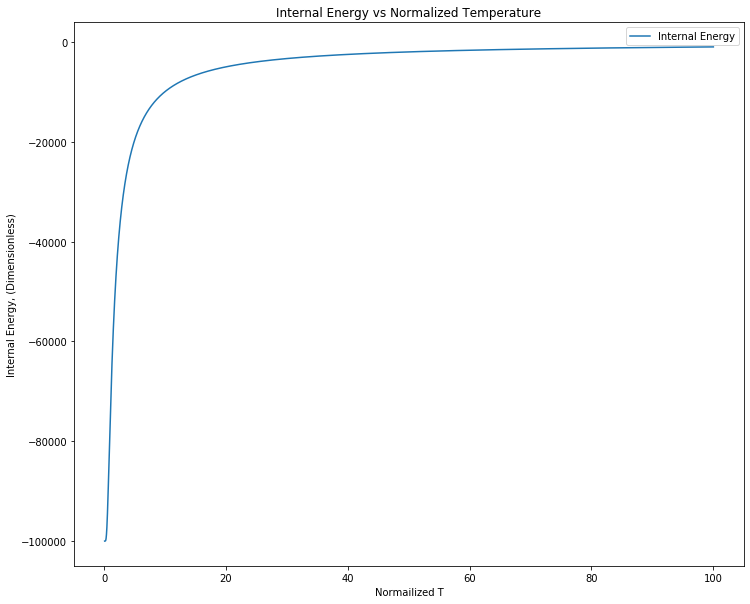

In [8]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
plt.figure(figsize=(12,10))
plt.plot(T,spin_Total_Energy(N,T,epsillon), label = 'Internal Energy')
plt.title("Internal Energy vs Normalized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Internal Energy, (Dimensionless)')
plt.legend(loc = 'best')
plt.show()

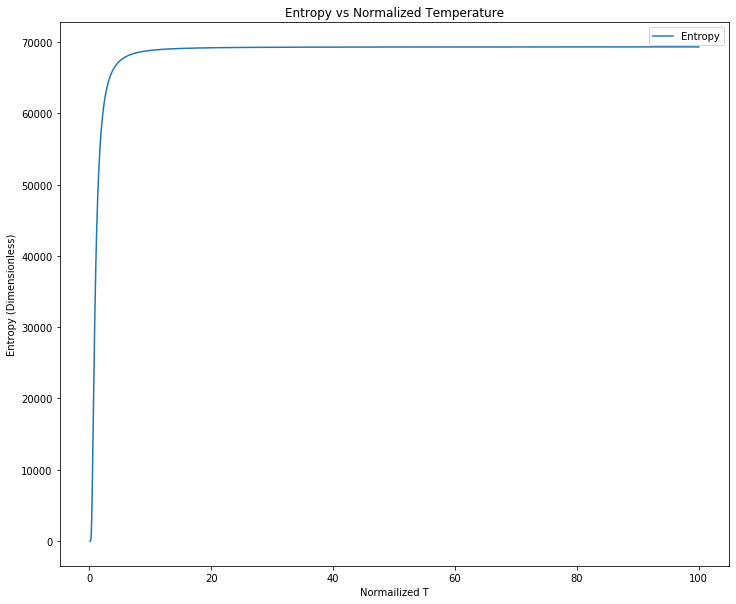

In [9]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
plt.figure(figsize=(12,10))
plt.plot(T,Entropy_spin(N,T,epsillon),label = "Entropy")
plt.title("Entropy vs Normalized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Entropy (Dimensionless)')
plt.legend(loc ='best')
plt.show()

### Discussion for Spin flip simmulation.


#### Probabilities vs Temperature: We can see that as temperature rises, all the probabilities converge on 1/2 (0.5), largely as expected since high temperature allows the system to spin in any way. Furthermore, we can see that when the temperature is low, almost all of the probability is in the spin down state. That's because the spin up state has the lowest energy value, and when a system is in low temperature it tends to be in the lowest possible energy state. 

#### Magnetizations vs Temperature: We can see that as temperature rises, magnetization falls. This makes sense; as temperature rises, the previous alignment of all the particles in the spin down state which caused such high magnetization is jostled out of the way, thanks to the same argument as the above paragraph on probabilities, allowing for other states and so decreasing magnetization. It begins at 10000, because all 10000 particles are aligned in the spin up state.

#### Internal energies vs Temperature: As temperature rises, internal energies rise. This makes sense, as spin down was the lowest energy state, and as temperature rises, the probability of a particle being in that state decreases, increasing with the higher energy states of spin up, so internal energy should rise and converge on 0 (when spin up and spin down are both equally balanced). It begins at -10000, as all 10000 particles are aligned in the spin down state, which has a unitless energy of -1/2.

#### Entropies vs Temperature: As the temperature rises, the entropy very rapidly rises from nothing to slightly over 10000. This makes sense, as rising temperature changes the system from being all in one state (very ordered, little disorder, so no entropy) to being randomized across 2 possible states per particle (and so very high disorder, and so high entropy). The entrophy converges to N*ln(2) which is roughly 7000, where N is 10000. 


### The following programs the simulation of the Pauli Magnet as requested in Case (ii)

In [10]:
#pauli magnet

import numpy as np
import matplotlib.pyplot as plt

def partition_func_spin(T_matilda, epsillon):
    
    '''
    function takes Normalized T and epsillon (energy of Pauli State)
    returns the partition function for Pauli Magnets as analytically derived.
    '''
    
    return 2*np.cosh(epsillon/T_matilda) + 1

def pauli_probabilities(T_matilda, epsillon):
    
    '''
    function takes Normalized T and epsillon (energy of Pauli State).
    returns the probabilities p1,p2,p3 for the Pauli Magnet as analytically derived.
    '''
    
    p1 = (np.exp(epsillon/T_matilda))/partition_func_spin(T_matilda,epsillon)
    p2 = 1/partition_func_spin(T_matilda,epsillon)
    p3 = (np.exp(-epsillon/T_matilda))/partition_func_spin(T_matilda,epsillon)
    
    return p1,p2,p3


def pauli_Total_Energy(N,T_matilda,epsillon):
    
    
    '''
    function takes Normalized T, epsillon (energy of Pauli State) and the number of particles of in the system, N.
    returns the total energy without units, for the Pauli Magnet as analytically derived.
    '''
    
    return epsillon*N*(pauli_probabilities(T_matilda, epsillon)[2]-pauli_probabilities(T_matilda, epsillon)[0])

def Pauli_Magnetization(N,T_matilda,epsillon):
    
    #units of u_B
    
    '''
    function takes Normalized T, epsillon (energy of Pauli State) and the number of particles of in the system, N.
    returns the Magnetization without units, for the Pauli Magnet as analytically derived.
    '''
    
    return N*(pauli_probabilities(T_matilda, epsillon)[0]-pauli_probabilities(T_matilda, epsillon)[2])
    
def Entropy_Pauli(N,T_matilda,epsillon):
    
    '''
    function takes Normalized T, epsillon (energy of the flip) and the number of particles of in the system, N.
    returns the entropy without units, for the Pauli Magnet as analytically derived.
    '''
    
    p1 = pauli_probabilities(T_matilda, epsillon)[0]
    p2 = pauli_probabilities(T_matilda, epsillon)[1]
    p3 = pauli_probabilities(T_matilda, epsillon)[2]
    
    return -N*(p1*np.log(p1) + p2*np.log(p2) + p3*np.log(p3))


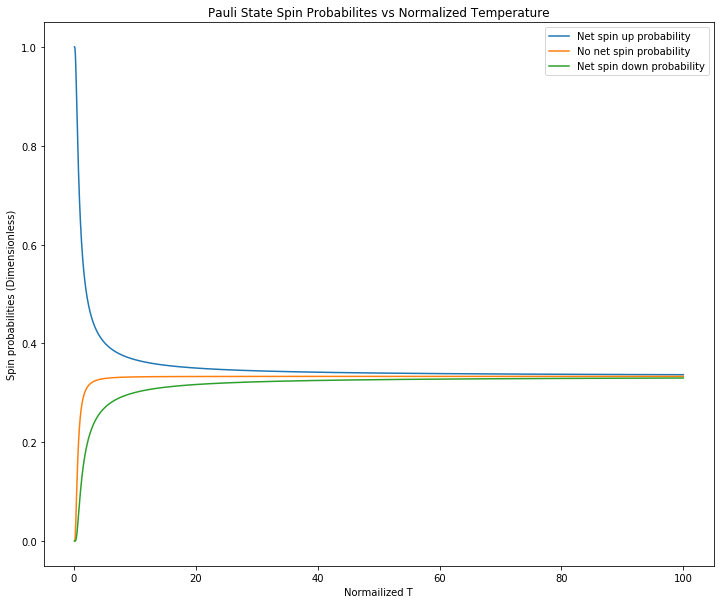

In [11]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
#plt.plot(T,partition_func_spin(T,epsillon))
plt.figure(figsize=(12,10))
plt.plot(T,pauli_probabilities(T, epsillon)[0],label = 'Net spin up probability')
#plt.plot(T,pauli_probabilities(T, epsillon)[2], label = 'net spin down probability(prob3)')
plt.plot(T,pauli_probabilities(T, epsillon)[1], label = 'No net spin probability')
plt.plot(T,pauli_probabilities(T, epsillon)[2], label = 'Net spin down probability')
plt.title("Pauli State Spin Probabilites vs Normalized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Spin probabilities (Dimensionless)')
plt.legend(loc ='best')
plt.show()

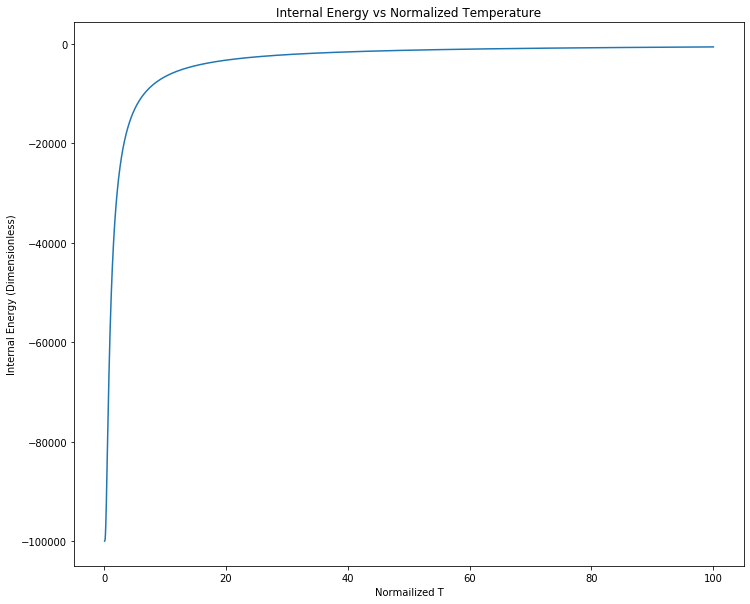

In [12]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
plt.figure(figsize=(12,10))
plt.plot(T,pauli_Total_Energy(N,T,epsillon))
plt.title("Internal Energy vs Normalized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Internal Energy (Dimensionless)')
plt.show()

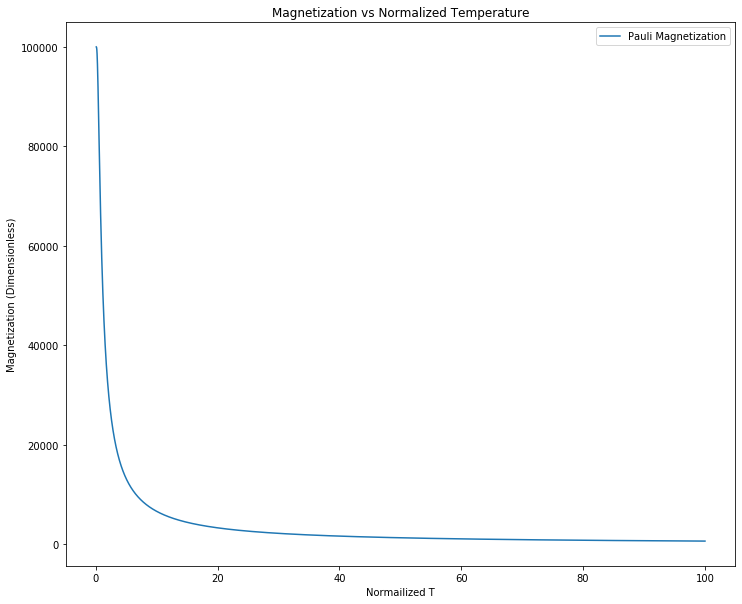

In [13]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
#plt.plot(T,partition_func_spin(T,epsillon))
plt.figure(figsize=(12,10))
plt.plot(T,Pauli_Magnetization(N,T,epsillon),label = 'Pauli Magnetization')

plt.title("Magnetization vs Normalized Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Magnetization (Dimensionless)')
plt.legend(loc ='best')
plt.show()

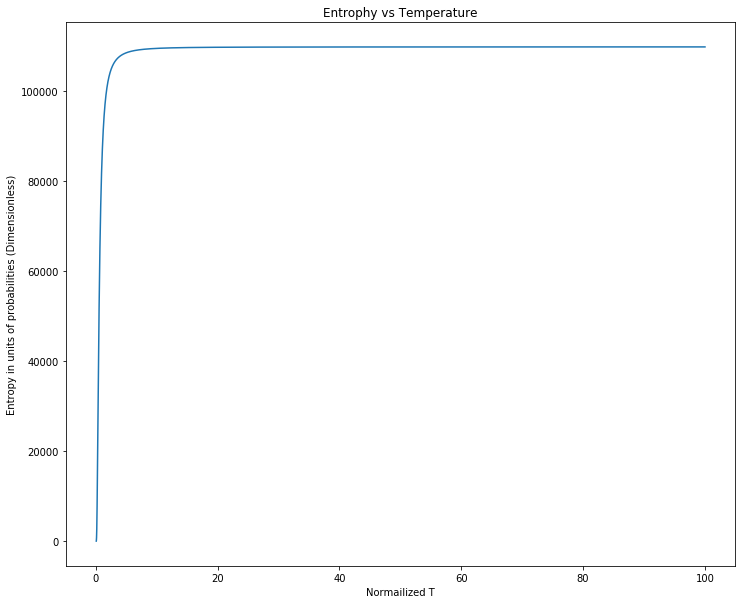

In [14]:
epsillon = 1
T = np.linspace(0.1,100,1000000)
N = 100000
plt.figure(figsize=(12,10))
plt.plot(T,Entropy_Pauli(N,T,epsillon))
plt.title("Entrophy vs Temperature")
plt.xlabel("Normailized T")
plt.ylabel('Entropy in units of probabilities (Dimensionless)')
plt.show()

### Discussion: Pauli Magnet Simulation

#### Probabilities vs Temperature: We can see that as temperature rises, all the probabilities converge on 1/3 (0.33333), largely as expected since high temperature allows the system to spin in any way. Furthermore, we can see that when the temperature is low, almost all of the probability is in the net spin down state. That's because the net spin down state has the lowest energy value, and when a system is in low temperature it tends to be in the lowest possible energy state. That's also why no net spin state rises faster than spin up state - because it's easier to gain one unit of energy first than to gain two as temperature rises. The plot also matches the last question perfectly

#### Magnetizations vs Temperature: We can see that as temperature rises, magnetization falls. This makes sense; as temperature rises, the previous alignment of all the particles in the spin down state which caused such high magnetization is jostled out of the way, thanks to the same argument as the above paragraph on probabilities, allowing for other states and so decreasing magnetization. It begins at 10000, because all 10000 particles are aligned in the spin down state. This also matches the question previously.

#### Internal energies vs Temperature: As temperature rises, internal energies rise. This makes sense, as spin down was the lowest energy state, and as temperature rises, the probability of a particle being in that state decreases, increasing with the higher energy states no net spin and spin up, so internal energy should rise and converge on 0 (when spin up and spin down are both equally balanced). It begins at -10000, as all 10000 particles are aligned in the spin down state, which has a unitless energy of -1. This also matches the previous question

#### Entropies vs Temperature: As the temperature rises, the entropy very rapidly rises from nothing to slightly over 10000. This makes sense, as rising temperature changes the system from being all in one state (very ordered, little disorder, so no entropy) to being randomized across 3 possible states per particle (and so very high disorder, and so high entropy). Note the very specific value entropy appears to go to this time. Last time, with probabilities = 1/2, it went to N*log(2). Similarly, this time it goes to N*ln(3) = N*1.09.... which is about 10900 in this case, which is where it converges to. This also matches the prior question